# Writing Reusable Code with Classes and Functions

### Julie Butler Hartley

### PHY321: Classical Mechanics

### February 16, 2022

* Many pieces of code will be reused throughout the course of this class...copy and paste is not sustainable
* Better practice: write one good piece of code in a way that can be used everywhere
* Functions and Classes

## 1. Start with a code you have written

* Euler's Method for an object in freefall with drag (Week 3 Notes)

,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,0.000000,-9.806550
1,0.1,0.049031,-0.980655,-9.804194
2,0.2,0.098034,-1.961074,-9.797128
3,0.3,0.146963,-2.940787,-9.785362
4,0.4,0.195770,-3.919323,-9.768915


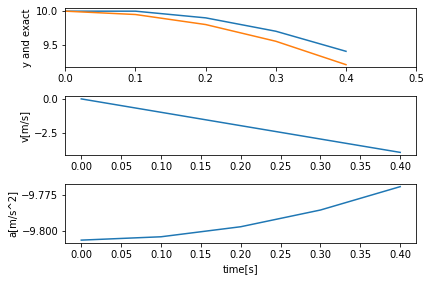

In [119]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

g = 9.80655 #m/s^2
D = 0.00245 #m/s
DeltaT = 0.1
#set up arrays 
tfinal = 0.5
n = ceil(tfinal/DeltaT)
# define scaling constant vT
vT = sqrt(g/D)
# set up arrays for t, a, v, and y and we can compare our results with analytical ones
t = np.zeros(n)
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)
yanalytic = np.zeros(n)
# Initial conditions
v[0] = 0.0  #m/s
y[0] = 10.0 #m
yanalytic[0] = y[0]
# Start integrating using Euler's method
for i in range(n-1):
    # expression for acceleration
    a[i] = -g + D*v[i]*v[i]
    # update velocity and position
    y[i+1] = y[i] + DeltaT*v[i]
    v[i+1] = v[i] + DeltaT*a[i]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
    if ( y[i+1] < 0.0):
        break
a[n-1] = -g + D*v[n-1]*v[n-1]
data = {'t[s]': t,
        'y[m]': y-yanalytic,
        'v[m/s]': v,
        'a[m/s^2]': a
        }
NewData = pd.DataFrame(data)
display(NewData)
#finally we plot the data
fig, axs = plt.subplots(3, 1)
axs[0].plot(t, y, t, yanalytic)
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('y and exact')
axs[1].plot(t, v)
axs[1].set_ylabel('v[m/s]')
axs[2].plot(t, a)
axs[2].set_xlabel('time[s]')
axs[2].set_ylabel('a[m/s^2]')
fig.tight_layout()
plt.show()

## 2. Identify Pieces of the Code that You Reuse (Or Could Reuse)

In [ ]:
g = 9.80655 #m/s^2
D = 0.00245 #m/s
# define scaling constant vT
vT = sqrt(g/D)

###############################################
# SETTING UP TIME
DeltaT = 0.1
#set up arrays 
tfinal = 0.5
n = ceil(tfinal/DeltaT)
t = np.zeros(n)
###############################################

###############################################
# SETTING UP THE INITIAL ARRAYS
# set up arrays for a, v, and y and we can compare our results with analytical ones
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)
yanalytic = np.zeros(n)
# Initial conditions
v[0] = 0.0  #m/s
y[0] = 10.0 #m
yanalytic[0] = y[0]
###############################################

###############################################
# EULER'S METHOD
# Start integrating using Euler's method
for i in range(n-1):
    # expression for acceleration
    a[i] = -g + D*v[i]*v[i]
    # update velocity and position
    y[i+1] = y[i] + DeltaT*v[i]
    v[i+1] = v[i] + DeltaT*a[i]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
    if ( y[i+1] < 0.0):
        break
a[n-1] = -g + D*v[n-1]*v[n-1]
###############################################

###############################################
# DISPSLAY THE DATA
data = {'t[s]': t,
        'y[m]': y-yanalytic,
        'v[m/s]': v,
        'a[m/s^2]': a
        }
NewData = pd.DataFrame(data)
display(NewData)
###############################################

###############################################
# GRAPH THE DATA
#finally we plot the data
fig, axs = plt.subplots(3, 1)
axs[0].plot(t, y, t, yanalytic)
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('y and exact')
axs[1].plot(t, v)
axs[1].set_ylabel('v[m/s]')
axs[2].plot(t, a)
axs[2].set_xlabel('time[s]')
axs[2].set_ylabel('a[m/s^2]')
fig.tight_layout()
plt.show()
###############################################

## 3. For Each Piece of Code You Identified, Try to Write a Function 
* Think about what the arguments fo the function need to be and what needs to be returned

In [ ]:
###############################################
# EULER'S METHOD
# Start integrating using Euler's method
for i in range(n-1):
    # expression for acceleration
    a[i] = -g + D*v[i]*v[i]
    # update velocity and position
    y[i+1] = y[i] + DeltaT*v[i]
    v[i+1] = v[i] + DeltaT*a[i]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
    if ( y[i+1] < 0.0):
        break
a[n-1] = -g + D*v[n-1]*v[n-1]
###############################################

* Arguments: n, DeltaT, t, a, v, y, yanalytic, g, D, vT
* Returns: t, a, v, y, yanalytic

In [110]:
###############################################
# EULER'S METHOD
def euler (n, DeltaT, t, a, v, y, yanalytic, g, D, vT):
    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = -g + D*v[i]*v[i]
        # update velocity and position
        y[i+1] = y[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT
        yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
        if ( y[i+1] < 0.0):
            break
    a[n-1] = -g + D*v[n-1]*v[n-1]
    return t, a, v, y, yanalytic
###############################################

In [111]:
###############################################
# SETTING UP TIME
def set_up_time (DeltaT, tfinal):
    n = ceil(tfinal/DeltaT)
    t = np.zeros(n)
    return n, t
###############################################

###############################################
# SETTING UP THE INITIAL ARRAYS
def set_up_initial_arrays (n, v_0, y_0):
    # set up arrays for t, a, v, and y and we can compare our results with analytical ones
    a = np.zeros(n)
    v = np.zeros(n)
    y = np.zeros(n)
    yanalytic = np.zeros(n)
    # Initial conditions
    v[0] = v_0  #m/s
    y[0] = y_0 #m
    yanalytic[0] = y[0]
    return a, v, y, yanalytic
###############################################

###############################################
# EULER'S METHOD
def euler (n, DeltaT, t, a, v, y, yanalytic, g, D, vT):
    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = -g + D*v[i]*v[i]
        # update velocity and position
        y[i+1] = y[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT
        yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
        if ( y[i+1] < 0.0):
            break
    a[n-1] = -g + D*v[n-1]*v[n-1]
    return t, a, v, y, yanalytic
###############################################

###############################################
# DISPSLAY THE DATA
def display_data (t, a, v, y, yanalytic):
    data = {'t[s]': t,
            'y[m]': y-yanalytic,
            'v[m/s]': v,
            'a[m/s^2]': a
            }
    NewData = pd.DataFrame(data)
    display(NewData)
###############################################

###############################################
# GRAPH THE DATA
#finally we plot the data
def graph_data (t, a, v, y, yanalytic):
    fig, axs = plt.subplots(3, 1)
    axs[0].plot(t, y, t, yanalytic)
    axs[0].set_xlim(0, tfinal)
    axs[0].set_ylabel('y and exact')
    axs[1].plot(t, v)
    axs[1].set_ylabel('v[m/s]')
    axs[2].plot(t, a)
    axs[2].set_xlabel('time[s]')
    axs[2].set_ylabel('a[m/s^2]')
    fig.tight_layout()
    plt.show()
###############################################



,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,10.000000,-9.561550
1,0.1,1.049031,9.043845,-9.606162
2,0.2,2.100484,8.083229,-9.646470
3,0.3,3.153843,7.118582,-9.682398
4,0.4,4.208587,6.150342,-9.713875


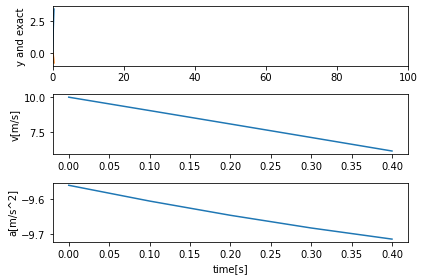

In [112]:
g = 9.80655 #m/s^2
D = 0.00245 #m/s
# define scaling constant vT
vT = sqrt(g/D)
n,t = set_up_time (DeltaT=0.1, tfinal=0.5)
a, v, y, yanalytic = set_up_initial_arrays (n=n, v_0=10, y_0=0)
t, a, v, y, yanalytic = euler (n=n, DeltaT=0.1, t=t, a=a, v=v, y=y, yanalytic=yanalytic, g=g, D=D, vT=vT)
display_data(t, a, v, y, yanalytic)
graph_data(t, a, v, y, yanalytic)

## 4. Identify Places Where You Can Make the Code More General

In [36]:
###############################################
# EULER'S METHOD
def euler (n, DeltaT, t, a, v, y, yanalytic, g, D, vT):
    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = -g + D*v[i]*v[i] ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
        # update velocity and position
        y[i+1] = y[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT
        yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT)) ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
        if ( y[i+1] < 0.0): ## WHAT IF WE DON'T WANT TO STOP HERE??
            break
    a[n-1] = -g + D*v[n-1]*v[n-1] ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
    return t, a, v, y, yanalytic
###############################################


Fixing the extra argument is fairly simple, but the equations for acceleration and the analytical solution will be harder.

In [113]:
###############################################
# EULER'S METHOD
def euler (n, DeltaT, t, a, v, y, yanalytic, g, D, vT, min_position): # Note the extra argument
    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = -g + D*v[i]*v[i] ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
        # update velocity and position
        y[i+1] = y[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT
        yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT)) ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
        if ( y[i+1] < min_position):
            break
    a[n-1] = -g + D*v[n-1]*v[n-1] ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
    return t, a, v, y, yanalytic
###############################################

## 5. See If You Can Make the Code More General  by Passing Functions

In [114]:
def freefall_acceleration (g, D, v):
    return -g + D*v*v
def freefall_yanalytic (g, D, y_0, t, v_0=0):
    vT = sqrt(g/D)
    return y_0-(vT*vT/g)*log(cosh(g*t/vT))

In [115]:
###############################################
# EULER'S METHOD
def euler (n, DeltaT, t, a, v, y, yanalytic, g, D, min_position, acceleration_eq, yanalytic_eq):
    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = acceleration_eq (g, D, v[i]) ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
        # update velocity and position
        y[i+1] = y[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT
        yanalytic[i+1] = yanalytic_eq(g, D, y[0], t[i+1], v[0]) ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
        if ( y[i+1] < min_position):
            break
    a[n-1] = acceleration_eq (g, D, v[n-1]) ## THIS EQUATION IS SPECIFICALLY FOR FREEFALL
    return t, a, v, y, yanalytic
###############################################

,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,10.000000,-9.561550
1,0.1,1.049031,9.043845,-9.606162
2,0.2,2.100484,8.083229,-9.646470
3,0.3,3.153843,7.118582,-9.682398
4,0.4,4.208587,6.150342,-9.713875


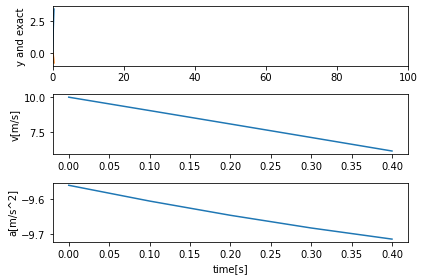

In [116]:
n,t = set_up_time (DeltaT=0.1, tfinal=0.5)
a, v, y, yanalytic = set_up_initial_arrays (n=n, v_0=10, y_0=0)
t, a, v, y, yanalytic = euler (n=n, DeltaT=0.1, t=t, a=a, v=v, y=y, yanalytic=yanalytic, g=g, D=D,min_position=0.0,\
                               acceleration_eq=freefall_acceleration, yanalytic_eq=freefall_yanalytic)
display_data(t, a, v, y, yanalytic)
graph_data(t, a, v, y, yanalytic)

In [117]:
def freefall_no_drag_acceleration  (g, D, v): #Arguments must be in the same order
    return -g
def freefall_no_drag_yanalytic (g, D, y_0, t, v_0):
    return -0.5*g*t**2 + v_0*t + y_0

,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,10.000000,-9.80655
1,0.1,0.049033,9.019345,-9.80655
2,0.2,0.098065,8.038690,-9.80655
3,0.3,0.147098,7.058035,-9.80655
4,0.4,0.196131,6.077380,-9.80655


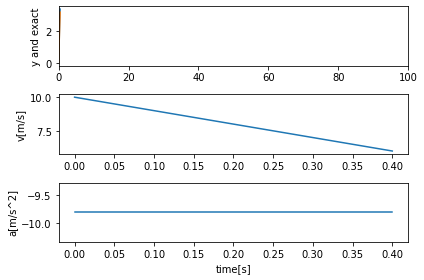

In [118]:
n,t = set_up_time (DeltaT=0.1, tfinal=0.5)
a, v, y, yanalytic = set_up_initial_arrays (n=n, v_0=10, y_0=0)
t, a, v, y, yanalytic = euler (n=n, DeltaT=0.1, t=t, a=a, v=v, y=y, yanalytic=yanalytic, g=g, D=D, min_position=0.0,\
                               acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
display_data(t, a, v, y, yanalytic)
graph_data(t, a, v, y, yanalytic)

## 6. Go Through Your Code And Identify Places Where There May Be User Errors

,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,10.000000,-9.80655
1,0.1,0.049033,9.019345,-9.80655
2,0.2,0.098065,8.038690,-9.80655
3,0.3,0.147098,7.058035,-9.80655
4,0.4,0.196131,6.077380,-9.80655
...,...,...,...,...
95,0.0,0.000000,0.000000,0.00000
96,0.0,0.000000,0.000000,0.00000
97,0.0,0.000000,0.000000,0.00000
98,0.0,0.000000,0.000000,0.00000


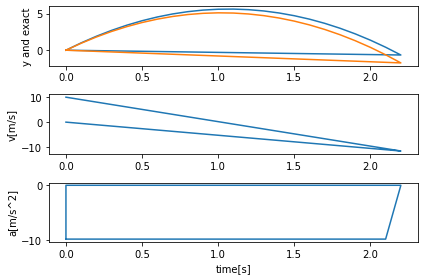

In [87]:
# What if the time was much larger?
n,t = set_up_time (DeltaT=0.1, tfinal=10.0)
a, v, y, yanalytic = set_up_initial_arrays (n=n, v_0=10, y_0=0)
t, a, v, y, yanalytic = euler (n=n, DeltaT=0.1, t=t, a=a, v=v, y=y, yanalytic=yanalytic, g=g, D=D, min_position=0.0,\
                               acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
display_data(t, a, v, y, yanalytic)
graph_data(t, a, v, y, yanalytic)

In [88]:
###############################################
# EULER'S METHOD
def euler (n, DeltaT, t, a, v, y, yanalytic, g, D, min_position, acceleration_eq, yanalytic_eq):
    i_stop = n
    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = acceleration_eq (g, D, v[i]) 
        # update velocity and position
        y[i+1] = y[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT
        yanalytic[i+1] = yanalytic_eq(g, D, y[0], t[i+1], v[0]) 
        if ( y[i+1] < min_position):
            stop_i = i+2
            break
    if stop_i != n:
        t = t[0:stop_i]
        a = a[0:stop_i]
        v = v[0:stop_i]
        y = y[0:stop_i]
        yanalytic = yanalytic[0:stop_i]
    a[-1] = acceleration_eq (g, D, v[-1]) 
    return t, a, v, y, yanalytic
###############################################


,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,10.000000,-9.80655
1,0.1,0.049033,9.019345,-9.80655
2,0.2,0.098065,8.038690,-9.80655
3,0.3,0.147098,7.058035,-9.80655
4,0.4,0.196131,6.077380,-9.80655
5,0.5,0.245164,5.096725,-9.80655
6,0.6,0.294196,4.116070,-9.80655
7,0.7,0.343229,3.135415,-9.80655
8,0.8,0.392262,2.154760,-9.80655
9,0.9,0.441295,1.174105,-9.80655


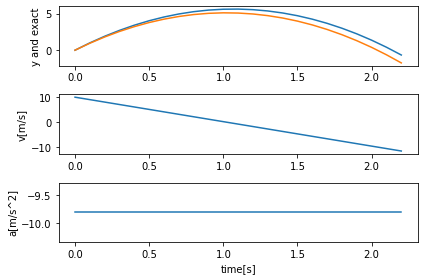

In [89]:
n,t = set_up_time (DeltaT=0.1, tfinal=100.0)
a, v, y, yanalytic = set_up_initial_arrays (n=n, v_0=10, y_0=0)
t, a, v, y, yanalytic = euler (n=n, DeltaT=0.1, t=t, a=a, v=v, y=y, yanalytic=yanalytic, g=g, D=D, min_position=0.0,\
                               acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
display_data(t, a, v, y, yanalytic)
graph_data(t, a, v, y, yanalytic)

In [91]:
###############################################
# SETTING UP TIME
def set_up_time (DeltaT, tfinal):
    n = ceil(tfinal/DeltaT)
    t = np.zeros(n)
    return n, t
###############################################

In [92]:
# What if we don't pass numbers?
set_up_time('words', 'words')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [93]:
###############################################
# SETTING UP TIME
def set_up_time (DeltaT, tfinal):
    assert isinstance(DeltaT, float) or isinstance(DeltaT, int)
    assert isinstance(tfinal, float) or isinstance(tfinal, int)
    n = ceil(tfinal/DeltaT)
    t = np.zeros(n)
    return n, t
###############################################

In [94]:
set_up_time('words', 'words')

AssertionError: 

## 7. Prevent So Many Arguments And Returns By Making a Class (Optional)

In [ ]:
n,t = set_up_time (DeltaT=0.1, tfinal=100.0)
a, v, y, yanalytic = set_up_initial_arrays (n=n, v_0=10, y_0=0)
t, a, v, y, yanalytic = euler (n=n, DeltaT=0.1, t=t, a=a, v=v, y=y, yanalytic=yanalytic, g=g, D=D, min_position=0.0,\
                               acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
display_data(t, a, v, y, yanalytic)
graph_data(t, a, v, y, yanalytic)

When making a class, any variable used in more than one place becomes class level so it can be used everywhere!

In [98]:
class ClassicalMechanicsSolvers ():
    def __init__(self, g, D):
        self.g = g
        self.D = D
    ###############################################
    # SETTING UP TIME
    def set_up_time (self, DeltaT, tfinal):
        self.DeltaT = DeltaT
        self.n = ceil(tfinal/DeltaT)
        self.t = np.zeros(n)
    ###############################################

    ###############################################
    # SETTING UP THE INITIAL ARRAYS
    def set_up_initial_arrays (self, v_0, y_0): ## No longer need n as an argument
        # set up arrays for t, a, v, and y and we can compare our results with analytical ones
        self.a = np.zeros(self.n)
        self.v = np.zeros(self.n)
        self.y = np.zeros(self.n)
        self.yanalytic = np.zeros(self.n)
        # Initial conditions
        self.v[0] = v_0  #m/s
        self.y[0] = y_0 #m
        self.yanalytic[0] = y[0]
    ###############################################

    ###############################################
    # EULER'S METHOD
    def euler (self, min_position, acceleration_eq, yanalytic_eq):
        i_stop = self.n
        # Start integrating using Euler's method
        for i in range(self.n-1):
            # expression for acceleration
            self.a[i] = acceleration_eq (self.g, self.D, self.v[i]) 
            # update velocity and position
            self.y[i+1] = self.y[i] + self.DeltaT*self.v[i]
            self.v[i+1] = self.v[i] + self.DeltaT*self.a[i]
            # update time to next time step and compute analytical answer
            self.t[i+1] = self.t[i] + self.DeltaT
            self.yanalytic[i+1] = yanalytic_eq(self.g, self.D, self.y[0], self.t[i+1], self.v[0]) 
            if ( self.y[i+1] < min_position):
                stop_i = i+2
                break
        if stop_i != self.n:
            self.t = self.t[0:stop_i]
            self.a = self.a[0:stop_i]
            self.v = self.v[0:stop_i]
            self.y = self.y[0:stop_i]
            self.yanalytic = self.yanalytic[0:stop_i]
        self.a[-1] = acceleration_eq (self.g, self.D, self.v[-1]) 
    ###############################################

    ###############################################
    # DISPSLAY THE DATA
    def display_data (self):
        data = {'t[s]': self.t,
                'y[m]': self.y-self.yanalytic,
                'v[m/s]': self.v,
                'a[m/s^2]': self.a
                }
        NewData = pd.DataFrame(data)
        display(NewData.head())
    ###############################################

    ###############################################
    # GRAPH THE DATA
    #finally we plot the data
    def graph_data (self):
        fig, axs = plt.subplots(3, 1)
        axs[0].plot(self.t, self.y, self.t, self.yanalytic)
        axs[0].set_ylabel('y and exact')
        axs[1].plot(self.t, self.v)
        axs[1].set_ylabel('v[m/s]')
        axs[2].plot(self.t, self.a)
        axs[2].set_xlabel('time[s]')
        axs[2].set_ylabel('a[m/s^2]')
        fig.tight_layout()
        plt.show()
    ###############################################

,t[s],y[m],v[m/s],a[m/s^2]
0,0.00,0.000000,10.000000,-9.80655
1,0.01,0.000490,9.901934,-9.80655
2,0.02,0.000981,9.803869,-9.80655
3,0.03,0.001471,9.705803,-9.80655
4,0.04,0.001961,9.607738,-9.80655
...,...,...,...,...
201,2.01,0.098556,-9.711166,-9.80655
202,2.02,0.099046,-9.809231,-9.80655
203,2.03,0.099536,-9.907297,-9.80655
204,2.04,0.100027,-10.005362,-9.80655


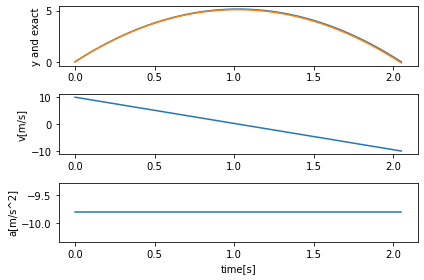

In [103]:
g = 9.80655 #m/s^2
D = 0.00245 #m/s
cm = ClassicalMechanicsSolvers (g, D)
cm.set_up_time (DeltaT=0.01, tfinal=100.0)
cm.set_up_initial_arrays (v_0=10, y_0=0)
cm.euler (min_position=0.0, acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
cm.display_data()
cm.graph_data()

## 8. See If There Are Ways to Reduce The Number of Function Calls (Optional)

In [ ]:
g = 9.80655 #m/s^2
D = 0.00245 #m/s
cm = ClassicalMechanicsSolvers (g, D)

################################################
# THESE ARE ALWAYS CALLED
cm.set_up_time (DeltaT=0.01, tfinal=100.0)
cm.set_up_initial_arrays (v_0=10, y_0=0)
################################################

cm.euler (min_position=0.0, acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
cm.display_data()
cm.graph_data()

In [105]:
class ClassicalMechanicsSolvers ():
    def __init__(self, g, D, DeltaT, tfinal, v_0, y_0):
        self.g = g
        self.D = D
        self.set_up_time (DeltaT, tfinal)
        self.set_up_initial_arrays (v_0, y_0)
        
    ###############################################
    # SETTING UP TIME
    def set_up_time (self, DeltaT, tfinal):
        self.DeltaT = DeltaT
        self.n = ceil(tfinal/DeltaT)
        self.t = np.zeros(self.n)
    ###############################################

    ###############################################
    # SETTING UP THE INITIAL ARRAYS
    def set_up_initial_arrays (self, v_0, y_0): ## No longer need n as an argument
        # set up arrays for t, a, v, and y and we can compare our results with analytical ones
        self.a = np.zeros(self.n)
        self.v = np.zeros(self.n)
        self.y = np.zeros(self.n)
        self.yanalytic = np.zeros(self.n)
        # Initial conditions
        self.v[0] = v_0  #m/s
        self.y[0] = y_0 #m
        self.yanalytic[0] = self.y[0]
    ###############################################

    ###############################################
    # EULER'S METHOD
    def euler (self, min_position, acceleration_eq, yanalytic_eq):
        i_stop = self.n
        # Start integrating using Euler's method
        for i in range(self.n-1):
            # expression for acceleration
            self.a[i] = acceleration_eq (self.g, self.D, self.v[i]) 
            # update velocity and position
            self.y[i+1] = self.y[i] + self.DeltaT*self.v[i]
            self.v[i+1] = self.v[i] + self.DeltaT*self.a[i]
            # update time to next time step and compute analytical answer
            self.t[i+1] = self.t[i] + self.DeltaT
            self.yanalytic[i+1] = yanalytic_eq(self.g, self.D, self.y[0], self.t[i+1], self.v[0]) 
            if ( self.y[i+1] < min_position):
                stop_i = i+2
                break
        if stop_i != self.n:
            self.t = self.t[0:stop_i]
            self.a = self.a[0:stop_i]
            self.v = self.v[0:stop_i]
            self.y = self.y[0:stop_i]
            self.yanalytic = self.yanalytic[0:stop_i]
        self.a[-1] = acceleration_eq (self.g, self.D, self.v[-1]) 
    ###############################################

    ###############################################
    # DISPSLAY THE DATA
    def display_data (self):
        data = {'t[s]': self.t,
                'y[m]': self.y-self.yanalytic,
                'v[m/s]': self.v,
                'a[m/s^2]': self.a
                }
        NewData = pd.DataFrame(data)
        display(NewData.head())
    ###############################################

    ###############################################
    # GRAPH THE DATA
    #finally we plot the data
    def graph_data (self):
        fig, axs = plt.subplots(3, 1)
        axs[0].plot(self.t, self.y, self.t, self.yanalytic)
        axs[0].set_ylabel('y and exact')
        axs[1].plot(self.t, self.v)
        axs[1].set_ylabel('v[m/s]')
        axs[2].plot(self.t, self.a)
        axs[2].set_xlabel('time[s]')
        axs[2].set_ylabel('a[m/s^2]')
        fig.tight_layout()
        plt.show()
    ###############################################

,t[s],y[m],v[m/s],a[m/s^2]
0,0.00,0.000000,10.000000,-9.80655
1,0.01,0.000490,9.901934,-9.80655
2,0.02,0.000981,9.803869,-9.80655
3,0.03,0.001471,9.705803,-9.80655
4,0.04,0.001961,9.607738,-9.80655


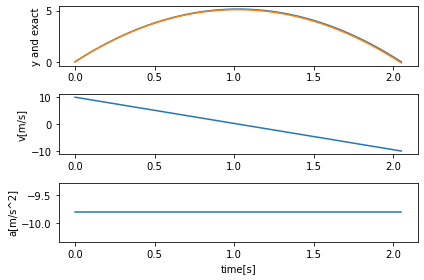

In [106]:
g = 9.80655 #m/s^2
D = 0.00245 #m/s
DeltaT = 0.01
tfinal = 100
v_0 = 10
y_0 = 0
cm = ClassicalMechanicsSolvers(g, D, DeltaT, tfinal, v_0, y_0)
cm.euler (min_position=0.0, acceleration_eq=freefall_no_drag_acceleration, yanalytic_eq=freefall_no_drag_yanalytic)
cm.display_data()
cm.graph_data()

## 9. Think About Other Functionality You Can Add To The Class

* Are there any other variables we should have in the initial arguments to make it more general?
* Can you make your class work for 2D data as well or is it limited to 1D?  Would it just be better to make another class to analyze 2D data?
* Can you add in other solvers?
* Should the function for acceleration and the analytical solution be included inside the class or not?  Will you use them other places?

**Bonus for Homework 6**: Submit a solvers class which implements Euler's, Euler-Cromer, and Velocity-Verlet as possible solvers (10 pts).

## 10. Using Your Code In Other Notebooks